In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
data = pd.read_csv(r"C:\Users\panda4\Downloads\train_20D8GL3.csv")
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0
5,28050,150000,2,1,2,29,-2,-2,-2,-2,...,987,0,14001,5067,131,987,400,14001,0,1
6,23327,260000,2,1,1,36,0,0,0,0,...,90857,-81334,142645,5000,6000,5020,81569,331788,10002,0
7,10728,50000,2,2,1,31,0,0,0,0,...,15993,15780,15549,2000,1223,1000,1000,1000,1000,0
8,17227,130000,2,2,2,24,0,0,0,0,...,109428,90359,89216,4155,5802,3487,2908,3013,3093,0
9,22039,60000,2,3,2,28,-1,-1,0,0,...,42984,38495,39038,87804,2000,1567,1320,1500,2000,0


In [86]:
data.describe()
data['EDUCATION'] = data['EDUCATION'].replace(5,6)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0
5,28050,150000,2,1,2,29,-2,-2,-2,-2,...,987,0,14001,5067,131,987,400,14001,0,1
6,23327,260000,2,1,1,36,0,0,0,0,...,90857,-81334,142645,5000,6000,5020,81569,331788,10002,0
7,10728,50000,2,2,1,31,0,0,0,0,...,15993,15780,15549,2000,1223,1000,1000,1000,1000,0
8,17227,130000,2,2,2,24,0,0,0,0,...,109428,90359,89216,4155,5802,3487,2908,3013,3093,0
9,22039,60000,2,3,2,28,-1,-1,0,0,...,42984,38495,39038,87804,2000,1567,1320,1500,2000,0


[]

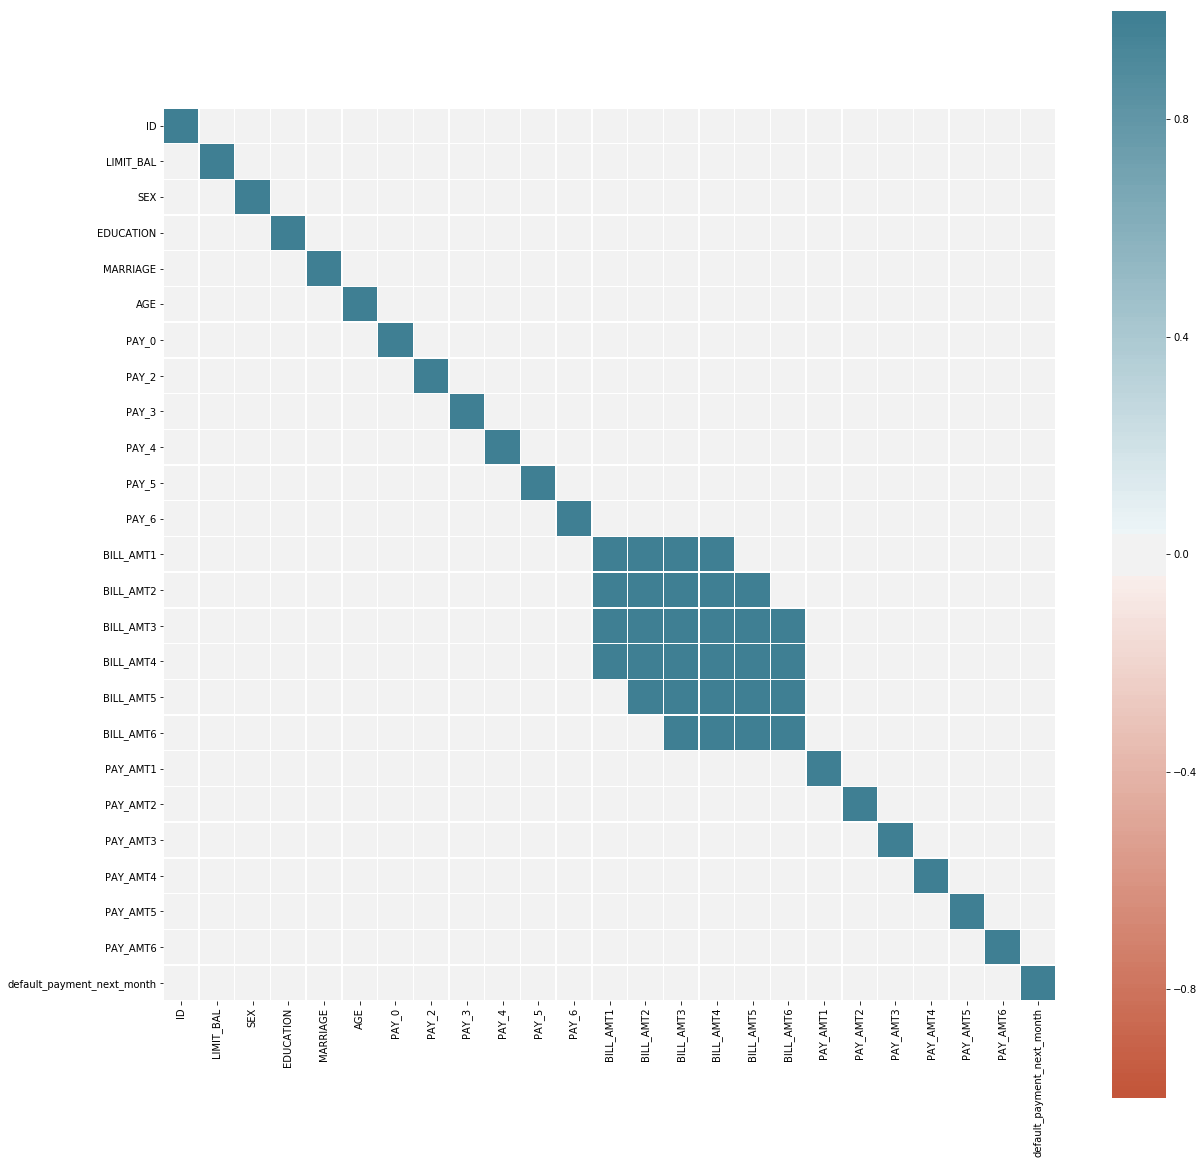

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corr>0.85, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,linewidths=0.5
)
ax.plot()

In [72]:
data.groupby('default_payment_next_month').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default_payment_next_month,,,,,,,,,,,,,,,,,,,,,
0,15026.017670,178153.592174,1.617365,1.856802,1.556405,35.428921,-0.206237,-0.295628,-0.315561,-0.355671,...,48078.405381,44076.679976,40906.776276,39419.521553,6369.907368,6679.975176,5816.066769,5284.227270,5315.105717,5789.031122
1,14678.651884,128699.177610,1.573089,1.888052,1.535199,35.576749,0.675565,0.465662,0.365770,0.265877,...,44254.426911,40960.327449,38609.095156,37211.797417,3279.548116,3257.713455,3041.347686,3064.171152,2972.813348,3179.088913


In [189]:
y, X = dmatrices('default_payment_next_month ~ LIMIT_BAL + SEX + MARRIAGE + AGE + \
                PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 +  PAY_AMT4 \
                 + PAY_AMT5 + PAY_AMT6', data=data, return_type='dataframe')
X.columns

Index(['Intercept', 'LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [179]:
y = np.ravel(y)
y

array([0., 0., 0., ..., 1., 0., 1.])

In [180]:
model = LogisticRegression()
model = model.fit(X,y)

model.score(X, y)

C:\Users\panda4\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7788095238095238

In [190]:
data_test = pd.read_csv(r"C:\Users\panda4\Downloads\test_O6kKpvt.csv")
data_test = data_test.drop(['ID', 'SEX', 'EDUCATION', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=1)
data_test['Intercept']=1
data_test

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Intercept
0,60000,1,30,0,0,0,0,0,0,1628,1618,1375,1403,1520,1205,1
1,200000,2,29,0,0,0,0,2,0,4160,14593,20150,0,5739,12050,1
2,230000,2,39,0,0,0,0,-2,-2,2500,2000,0,0,0,0,1
3,150000,2,40,0,0,0,0,0,0,5800,5245,5200,5200,6500,7200,1
4,140000,2,27,0,0,0,0,0,0,10000,10000,3393,3260,5000,3000,1
5,210000,2,41,0,0,0,0,0,0,9000,4000,3018,2000,3000,3000,1
6,50000,2,38,0,0,0,0,0,0,1266,1298,1285,650,825,1582,1
7,500000,1,61,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,1
8,300000,1,33,0,0,0,0,0,0,1514,1216,3127,3046,2011,142,1
9,50000,2,25,0,0,2,2,4,3,14200,2100,5215,0,0,0,1


In [191]:
predicted = model.predict(data_test)
print(predicted)
probability = model.predict_proba(data_test)
predicted_data = pd.DataFrame(data=predicted, columns = ['default_payment_next_month'])
predicted_data.loc[predicted_data['default_payment_next_month'] == 0]


[0. 0. 0. ... 0. 0. 0.]


,default_payment_next_month
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
10,0.0


In [192]:
data_test = pd.concat([data_test, predicted_data], axis=1)
data_test

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Intercept,default_payment_next_month
0,60000,1,30,0,0,0,0,0,0,1628,1618,1375,1403,1520,1205,1,0.0
1,200000,2,29,0,0,0,0,2,0,4160,14593,20150,0,5739,12050,1,0.0
2,230000,2,39,0,0,0,0,-2,-2,2500,2000,0,0,0,0,1,0.0
3,150000,2,40,0,0,0,0,0,0,5800,5245,5200,5200,6500,7200,1,0.0
4,140000,2,27,0,0,0,0,0,0,10000,10000,3393,3260,5000,3000,1,0.0
5,210000,2,41,0,0,0,0,0,0,9000,4000,3018,2000,3000,3000,1,0.0
6,50000,2,38,0,0,0,0,0,0,1266,1298,1285,650,825,1582,1,0.0
7,500000,1,61,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,1,0.0
8,300000,1,33,0,0,0,0,0,0,1514,1216,3127,3046,2011,142,1,0.0
9,50000,2,25,0,0,2,2,4,3,14200,2100,5215,0,0,0,1,1.0
